In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from individual_file import processor

In [9]:
comp = pd.DataFrame()
for number in range(2010,2020):
    comp[str(number)] = processor("acs\\{}_full.csv".format(number)).Delta
comp.insert(0, "Label", processor("acs/2017_full.csv").Label)
comp

,Label,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Total population,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Male,0.156466,0.122810,0.138071,0.153884,0.149419,0.149592,0.152752,0.145460,0.123519,0.123209
2,Female,-0.156466,-0.122810,-0.138071,-0.153884,-0.149419,-0.149592,-0.152752,-0.145460,-0.123519,-0.123209
3,Sex ratio (males per 100 females),-0.018866,-0.036165,-0.036866,-0.040606,-0.043992,-0.048359,-0.044623,0.028927,0.028717,0.028752
4,Under 5 years,-0.094031,-0.087530,-0.048968,-0.051093,-0.045823,-0.058620,-0.023609,-0.042236,-0.068529,-0.069713
...,...,...,...,...,...,...,...,...,...,...,...
68,Puerto Rican,-0.032882,-1.511352,-0.027184,-0.033534,0.761133,0.725298,-0.990907,-0.403978,-0.471374,-0.485394
69,Cuban,0.368466,0.751089,0.366594,0.379870,-1.245835,-1.310496,6.895091,-0.448287,-1.078123,-1.111224
70,Other Hispanic or Latino,-0.009381,-1.075642,-0.016817,-0.015325,0.153163,0.136950,8.372992,-1.109619,7.242535,7.313978
71,Not Hispanic or Latino,0.377846,0.146739,0.383411,0.395195,-0.040987,-0.031258,-1.414725,7.139223,8.637067,8.682231


In [12]:
print(comp.Label.to_string())

0                                      Total population
1                                                  Male
2                                                Female
3                     Sex ratio (males per 100 females)
4                                         Under 5 years
5                                          5 to 9 years
6                                        10 to 14 years
7                                        15 to 19 years
8                                        20 to 24 years
9                                        25 to 34 years
10                                       35 to 44 years
11                                       45 to 54 years
12                                       55 to 59 years
13                                       60 to 64 years
14                                       65 to 74 years
15                                       75 to 84 years
16                                    85 years and over
17                                   Median age 

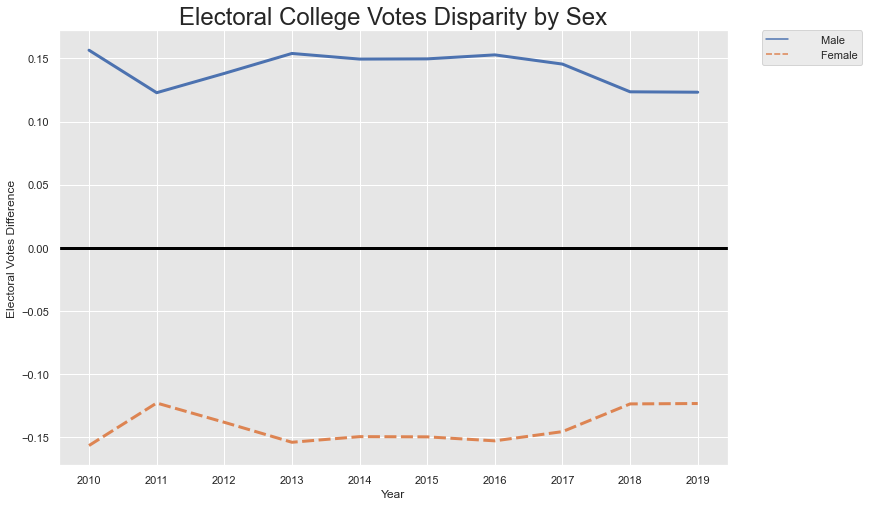

In [16]:
def plotter(temp, plot_topic):
    temp = temp.set_index("Label")
    temp = temp.transpose()

    sns.set(rc={'figure.figsize':(12,8)})

    # sns.set(style="whitegrid") #White background 
    sns.set_style("darkgrid", {"axes.facecolor": ".9"}) #grey background

    g = sns.lineplot(data = temp,linestyle = '-', linewidth = 3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    #axis line at y=0
    g.axhline(0, color = 'black', linewidth = 3)

    #labels + title
    g.set_title("Electoral College Votes Disparity by " + plot_topic, size=24)
    g.set(xlabel='Year', ylabel= "Electoral Votes Difference")
    return g

def gender(data):
    return plotter(data[1:3], "Sex")

def age(data):
    return plotter(data[8:14], "Age")


gender(comp)

In [4]:
temp = comp.T
temp

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
Label,Citizens 18 years and over,18 to 29 years,30 to 44 years,45 to 64 years,65 years and over,Male,Female,White alone,Black or African American alone,Asian alone,...,"Some college, no degree",Associate's degree,Bachelor's degree,Graduate or professional degree,High school degree or higher,Bachelor's degree or higher,"Total Citizens, 18 years and older, for wh...",Income in the past 12 months below poverty...,Income in the past 12 months at or above t...,Median Household Income for Households wit...
2017,0,0.122052,0.122005,-0.146388,-0.0976693,0.32162,-0.32162,2.0117,-2.17325,-0.324301,...,0.259318,0.0699405,-0.222617,-0.0236974,0.58706,-0.246314,-0.161347,-0.0301397,-0.131207,2.28413
2018,0,0.0634547,0.146213,-0.166687,-0.0429801,0.307172,-0.307172,1.9336,-2.1172,-0.30358,...,0.239951,0.157762,-0.219655,-0.0366307,0.602144,-0.256286,-0.156347,0.0255396,-0.181887,2.30275
2019,0,0.0564545,0.104765,-0.144754,-0.016465,0.26841,-0.26841,1.84522,-2.09632,-0.272461,...,0.176023,0.153373,-0.210448,-0.0209016,0.635966,-0.23135,-0.162589,0.0040889,-0.166677,2.42508


In [7]:
temp.columns = temp.iloc[0]
temp = temp.drop("Label")
temp

Label,Citizens 18 years and over,18 to 29 years,30 to 44 years,45 to 64 years,65 years and over,Male,Female,White alone,Black or African American alone,Asian alone,...,"Some college, no degree",Associate's degree,Bachelor's degree,Graduate or professional degree,High school degree or higher,Bachelor's degree or higher,"Total Citizens, 18 years and older, for whom poverty status is determined",Income in the past 12 months below poverty level,Income in the past 12 months at or above the poverty level,"Median Household Income for Households with a Citizen, Voting-Age Householder"
2017,0,0.122052,0.122005,-0.146388,-0.0976693,0.32162,-0.32162,2.0117,-2.17325,-0.324301,...,0.259318,0.0699405,-0.222617,-0.0236974,0.58706,-0.246314,-0.161347,-0.0301397,-0.131207,2.28413
2018,0,0.0634547,0.146213,-0.166687,-0.0429801,0.307172,-0.307172,1.9336,-2.1172,-0.30358,...,0.239951,0.157762,-0.219655,-0.0366307,0.602144,-0.256286,-0.156347,0.0255396,-0.181887,2.30275
2019,0,0.0564545,0.104765,-0.144754,-0.016465,0.26841,-0.26841,1.84522,-2.09632,-0.272461,...,0.176023,0.153373,-0.210448,-0.0209016,0.635966,-0.23135,-0.162589,0.0040889,-0.166677,2.42508
